# CPR appropriation

## Pre-requisites

In [31]:
%%capture
!pip install src/gym_cpr_grid
!pip install -r requirements.txt

In [20]:
import numpy as np
import gym

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Random policy

In [2]:
env = gym.make('gym_cpr_grid:CPRGridEnv-v0', n_agents=3, grid_width=5, grid_height=7)

KeyboardInterrupt: 

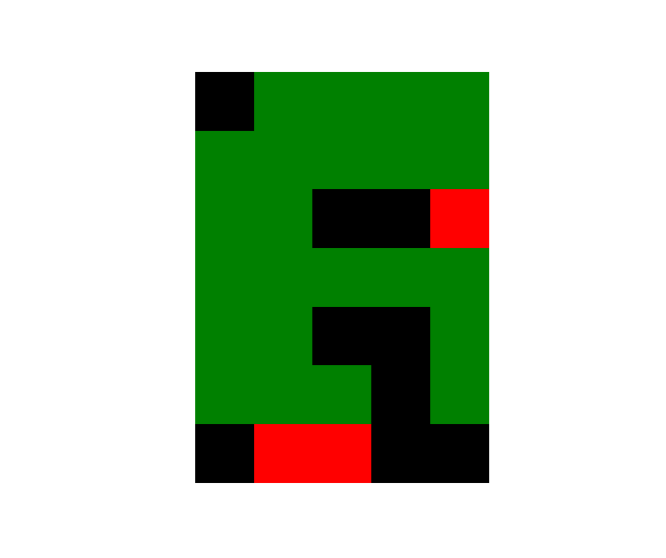

In [15]:
import matplotlib.pyplot as plt
from IPython import display

observations = env.reset()
fig, ax, img = env.plot(env.render('rgb_array'))
for _ in range(env.max_steps):
    display.display(plt.gcf())
    action_dict = {h: env.action_space.sample() for h in range(env.n_agents)}
    observations, rewards, dones, infos = env.step(action_dict)
    display.clear_output(wait=True)
    img.set_data(env.render(mode='rgb_array'))
env.close()

## RLlib baselines

In [43]:
from src import models, metrics
from ray.rllib.models import ModelCatalog

ModelCatalog.register_custom_model("fcn", models.FCNetwork)

In [54]:
np.nanmean([])

/var/folders/pp/wfj1kcws58g7pxksj9k8zdhw0000gn/T/ipykernel_54085/1400433968.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean([])


nan

In [56]:
from ray import tune
from ray.rllib.agents.dqn import DQNTrainer
from ray.rllib.models.torch.fcnet import FullyConnectedNetwork

tune.run(
    DQNTrainer, 
    config={
        "env": "gym_cpr_grid:CPRGridEnv-v0", 
        "env_config": {
            "n_agents": 3,
            "grid_width": 5,
            "grid_height": 7
        }, 
        "num_workers": 1, 
        "framework": "torch",
        "model": {
            "custom_model": "fcn",
            "fcnet_hiddens": [32, 32],
            "fcnet_activation": "relu",
        },
        "exploration_config": {
            "type": "EpsilonGreedy",
            "initial_epsilon": 1.0,
            "final_epsilon": 0.1,
            "epsilon_timesteps": env.max_steps,
        },
        "callbacks": metrics.SocialOutcomeMetrics
    }
)

Trial name,status,loc
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,PENDING,


(pid=59308) 2021-08-17 10:46:07,241	INFO trainer.py:718 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=59308) 2021-08-17 10:46:08,701	WARNING util.py:55 -- Install gputil for GPU system monitoring.


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 1008
  custom_metrics: {}
  date: 2021-08-17_10-46-09
  done: false
  episode_len_mean: .nan
  episode_media: {}
  episode_reward_max: .nan
  episode_reward_mean: .nan
  episode_reward_min: .nan
  episodes_this_iter: 0
  episodes_total: 0
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 1008
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005
          grad_gnorm: 0.3202398419380188
          max_q: 0.030251558870077133
          mean_q: 0.0010643387213349342
          mean_td_error: -0.21042399108409882
          min_q: -0.03131011873483658
        model: {}
        td_error: "[-3.8120970e-03  2.5434081e-02  2.9674888e-02 -3.9469264e-02\n -5.6403005e-03\
          \  2.9487411e-02  2.2136401e-02 -2.7131267e-02\n -2.1136487e-02  3.0517938e-02\
        

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,2,2.87218,2016,nan,nan,nan,nan


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 4032
  custom_metrics:
    efficiency_max: 0.4760850044400803
    efficiency_mean: 0.4760850044400803
    efficiency_min: 0.4760850044400803
    equality_max: 0.9323885759776877
    equality_mean: 0.9323885759776877
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 242.70936548583038
    sustainability_mean: 242.70936548583038
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-15
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 482.0
  episode_reward_mean: 482.0
  episode_reward_min: 482.0
  episodes_this_iter: 0
  episodes_total: 1
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 4032
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.00

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,5,9.39251,5040,482,482,482,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 6048
  custom_metrics:
    efficiency_max: 1.28975106401426
    efficiency_mean: 0.8829180342271701
    efficiency_min: 0.4760850044400803
    equality_max: 0.9603519067110708
    equality_mean: 0.9463702413443793
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 275.9550445694401
    sustainability_mean: 259.3322050276352
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-20
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 1540.0
  episode_reward_mean: 1011.0
  episode_reward_min: 482.0
  episodes_this_iter: 1
  episodes_total: 2
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 6048
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,7,14.3657,7056,1011,1540,482,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 8064
  custom_metrics:
    efficiency_max: 1.28975106401426
    efficiency_mean: 0.8829180342271701
    efficiency_min: 0.4760850044400803
    equality_max: 0.9603519067110708
    equality_mean: 0.9463702413443793
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 275.9550445694401
    sustainability_mean: 259.3322050276352
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-25
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 1540.0
  episode_reward_mean: 1011.0
  episode_reward_min: 482.0
  episodes_this_iter: 0
  episodes_total: 2
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 8064
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0005

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,9,19.4885,9072,1274.67,1802,482,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 10080
  custom_metrics:
    efficiency_max: 1.8052072951398896
    efficiency_mean: 1.1903477878647433
    efficiency_min: 0.4760850044400803
    equality_max: 0.9793831949774443
    equality_mean: 0.9573745592220676
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 275.9550445694401
    sustainability_mean: 256.0105253532074
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-31
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 1802.0
  episode_reward_mean: 1274.6666666666667
  episode_reward_min: 482.0
  episodes_this_iter: 0
  episodes_total: 3
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 10080
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
        

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,11,24.3744,11088,1274.67,1802,482,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 12096
  custom_metrics:
    efficiency_max: 1.848811199957644
    efficiency_mean: 1.3549636408879684
    efficiency_min: 0.4760850044400803
    equality_max: 0.9793831949774443
    equality_mean: 0.9624810389643393
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 275.9550445694401
    sustainability_mean: 254.18936421361957
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-36
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 1828.0
  episode_reward_mean: 1413.0
  episode_reward_min: 482.0
  episodes_this_iter: 1
  episodes_total: 4
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 12096
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,13,29.4656,13104,1413,1828,482,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 14112
  custom_metrics:
    efficiency_max: 1.848811199957644
    efficiency_mean: 1.3549636408879684
    efficiency_min: 0.4760850044400803
    equality_max: 0.9793831949774443
    equality_mean: 0.9624810389643393
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 275.9550445694401
    sustainability_mean: 254.18936421361957
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-41
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 1828.0
  episode_reward_mean: 1413.0
  episode_reward_min: 482.0
  episodes_this_iter: 0
  episodes_total: 4
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 14112
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.

Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,15,34.5658,15120,1493.4,1828,482,1000


Result for DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000:
  agent_timesteps_total: 16128
  custom_metrics:
    efficiency_max: 1.848811199957644
    efficiency_mean: 1.445845811541881
    efficiency_min: 0.4760850044400803
    equality_max: 0.9793831949774443
    equality_mean: 0.9606011121227434
    equality_min: 0.9323885759776877
    peace_max: 0.0
    peace_mean: 0.0
    peace_min: 0.0
    sustainability_max: 275.9550445694401
    sustainability_mean: 253.68424113418556
    sustainability_min: 242.70936548583038
  date: 2021-08-17_10-46-47
  done: false
  episode_len_mean: 1000.0
  episode_media: {}
  episode_reward_max: 1828.0
  episode_reward_mean: 1493.4
  episode_reward_min: 482.0
  episodes_this_iter: 0
  episodes_total: 5
  experiment_id: 60a83b91cba94bc396ea72ef383b811a
  hostname: wadaboa-work.local
  info:
    last_target_update_ts: 16128
    learner:
      default_policy:
        custom_metrics: {}
        learner_stats:
          allreduce_latency: 0.0
          cur_lr: 0.0

2021-08-17 10:46:50,181	WARNING tune.py:507 -- SIGINT received (e.g. via Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C one more time (or send SIGINT/SIGKILL/SIGTERM) to skip. 


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,17,39.5647,17136,1493.4,1828,482,1000


Trial name,status,loc,iter,total time (s),ts,reward,episode_reward_max,episode_reward_min,episode_len_mean
DQN_gym_cpr_grid:CPRGridEnv-v0_8f194_00000,RUNNING,192.168.1.110:59308,17,39.5647,17136,1493.4,1828,482,1000


(pid=59308) 2021-08-17 10:46:50,359	ERROR worker.py:421 -- SystemExit was raised from the worker
(pid=59308) Traceback (most recent call last):
(pid=59308)   File "python/ray/_raylet.pyx", line 632, in ray._raylet.task_execution_handler
(pid=59308)   File "python/ray/_raylet.pyx", line 486, in ray._raylet.execute_task
(pid=59308)   File "python/ray/_raylet.pyx", line 523, in ray._raylet.execute_task
(pid=59308)   File "python/ray/_raylet.pyx", line 530, in ray._raylet.execute_task
(pid=59308)   File "python/ray/_raylet.pyx", line 534, in ray._raylet.execute_task
(pid=59308)   File "python/ray/_raylet.pyx", line 484, in ray._raylet.execute_task.function_executor
(pid=59308)   File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/_private/function_manager.py", line 563, in actor_method_executor
(pid=59308)     return method(__ray_actor, *args, **kwargs)
(pid=59308)   File "/Users/jobs/Github/cpr-appropriation/venv/lib/python3.9/site-packages/ray/tune/trainable.p

2021-08-17 10:46:50,541	INFO tune.py:550 -- Total run time: 45.15 seconds (44.92 seconds for the tuning loop).
2021-08-17 10:46:50,542	WARNING tune.py:554 -- Experiment has been interrupted, but the most recent state was saved. You can continue running this experiment by passing `resume=True` to `tune.run()`
